In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time

In [93]:
def parser(s):
    return datetime.strptime(s,'%Y-%m-%d')

In [94]:
production_ice_cream=pd.read_csv('https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream.csv',parse_dates=[0],index_col=0,date_parser=parser)
production_ice_cream

C:\Users\VIJAY ISRANI\AppData\Local\Temp\ipykernel_13216\2685847453.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  production_ice_cream=pd.read_csv('https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream.csv',parse_dates=[0],index_col=0,date_parser=parser)


,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


In [95]:
production_ice_cream = production_ice_cream.asfreq(pd.infer_freq(production_ice_cream.index))

In [96]:
start_date=pd.to_datetime('2010-01-01')
production_ice_cream=production_ice_cream[start_date:]

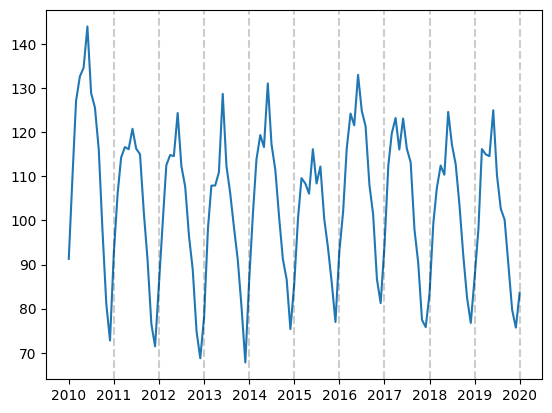

In [97]:
plt.plot(production_ice_cream)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

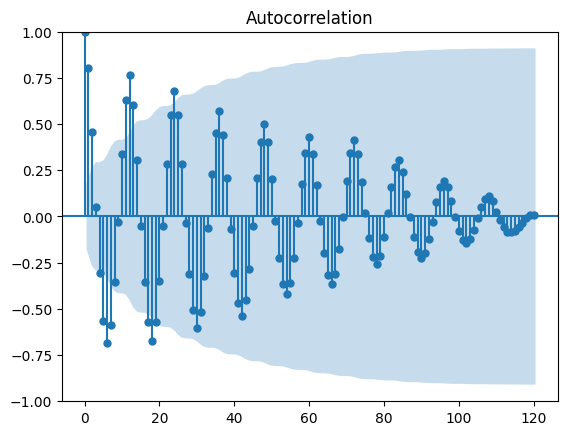

In [98]:
acf_plot=plot_acf(production_ice_cream,lags=120)

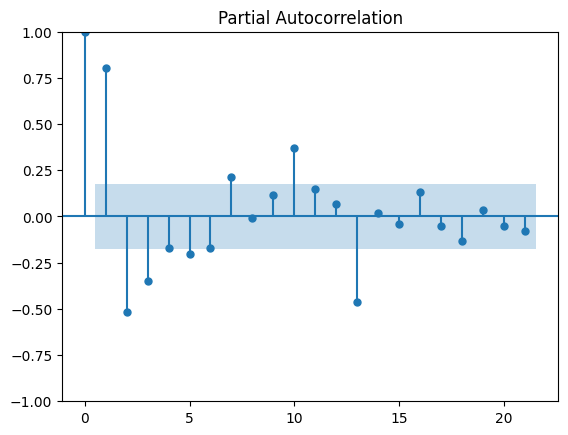

In [99]:
pacf_plot=plot_pacf(production_ice_cream)

In [100]:
train_end=datetime(2018,12,1)
test_end=datetime(2019,12,1)
train_data=production_ice_cream[:train_end]
test_data=production_ice_cream[train_end+timedelta(days=1):test_end]

In [101]:
test_data = test_data.rename(columns={'IPN31152N': 'predicted_mean'})

In [102]:
model=ARIMA(train_data,order=(3,0,0))

In [103]:
model_fit=model.fit()

In [104]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              IPN31152N   No. Observations:                  108
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -374.085
Date:                Tue, 02 Jul 2024   AIC                            758.170
Time:                        18:10:25   BIC                            771.580
Sample:                    01-01-2010   HQIC                           763.607
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5743      2.169     47.761      0.000      99.324     107.825
ar.L1          1.0469      0.102     10.256      0.000       0.847       1.247
ar.L2         -0.0523      0.175     -0.298      0.7

In [105]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [106]:
predictions=model_fit.predict(start=pred_start_date,end=pred_end_date)
predictions=pd.DataFrame(predictions)
residuals=test_data -predictions
residuals

,predicted_mean
DATE,
2019-01-01,5.762551
2019-02-01,7.971090
2019-03-01,14.648628
2019-04-01,3.806251
2019-05-01,-2.499282
2019-06-01,6.834654
2019-07-01,-4.770283
2019-08-01,-6.747015
2019-09-01,-2.967977


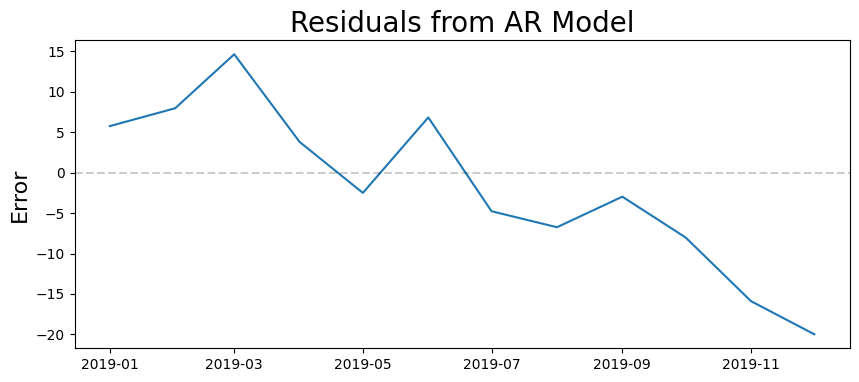

In [107]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)